# 🌍 Solar Potential Comparison: Benin 🇧🇯 | Sierra Leone 🇸🇱 | Togo 🇹🇬

*Evaluating Global Horizontal Irradiance (GHI), Direct Normal Irradiance (DNI), and Diffuse Horizontal Irradiance (DHI) for strategic solar deployment.*


In [7]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, kruskal
import warnings
import sys
sys.path.append('../scripts')
from visualization_utils import SolarVisualizer

In [2]:
#suppress all warnings
warnings.filterwarnings("ignore")



## 📌1. Introduction

Welcome to the **Cross-Country Solar Potential Analysis** — a project developed as part of the **10 Academy Week 1 Challenge** for candidates aspiring to join the 12-week intensive training in:

- 🛠️ **Data Engineering (DE)**
- 📊 **Financial Analytics (FA)**
- 🤖 **Machine Learning Engineering (MLE)**

This notebook focuses on **analyzing and comparing solar radiation data** from three West African countries: **Benin**, **Sierra Leone**, and **Togo**. Using exploratory data analysis, statistical comparisons, and visualization techniques, we aim to:

- Assess **solar energy potential** across countries,
- Identify key **variations and patterns**, and
- Deliver **insights** to guide strategic solar investments for **MoonLight Energy Solutions**.

---

## 🧭 Background

🌞 **MoonLight Energy Solutions** is on a mission to scale clean energy deployment by identifying the most promising regions for **solar installation**. This project supports that mission by evaluating environmental data collected in **Benin**, **Sierra Leone**, and **Togo**, including:

- ☀️ **GHI (Global Horizontal Irradiance)** – Total solar radiation on a horizontal surface
- 🔆 **DNI (Direct Normal Irradiance)** – Direct solar radiation perpendicular to the sun’s rays
- 🌤️ **DHI (Diffuse Horizontal Irradiance)** – Solar radiation received indirectly

Other recorded environmental variables include **air temperature**, **humidity**, **wind speed**, **precipitation**, and **sensor cleaning events**.

📈 This notebook will:
- Visualize solar metrics across countries using **boxplots** and **bar charts**
- Compare country-level averages with a **summary statistics table**
- Run statistical tests like **ANOVA** or **Kruskal–Wallis** to check for significant differences
- Summarize key takeaways to support **data-driven decision-making**

---


## 📦 2. Data Loading & Overview  <a id= '2-data-loading--overview'></a>

➤ Load data

In [3]:
benin = pd.read_csv('../data/benin_clean.csv')
togo = pd.read_csv('../data/togo_clean.csv')
sl = pd.read_csv('../data/sierraleone_clean.csv')


➤ Add a country label to each DataFrame

In [4]:
benin['country'] = 'Benin'
togo['country'] = 'Togo'
sl['country'] = 'Sierra Leone'


➤ Add a country label to each DataFrame

In [5]:
benin['country'] = 'Benin'
togo['country'] = 'Togo'
sl['country'] = 'Sierra Leone'


➤ Concatenate

In [6]:
#concatenate the three dataframes
f = pd.concat([benin, togo, sl], ignore_index=True)

In [8]:
#inspect the dataframe
f.sample(10)

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,country
1512169,2022-09-15 02:50:00,0.000,0.000,0.000,0.000,0.000,24.0,100.0,0.0,0.0,0.0,0.0,0.0,1001,0,0.0,24.6,24.8,Sierra Leone
134487,2022-01-31 09:28:00,5.940,5.815,5.335,6.092,5.950,25.0,74.1,1.5,1.9,0.4,104.1,18.8,1001,0,0.0,33.1,35.3,Benin
162136,2022-02-19 14:17:00,6.644,5.991,6.025,6.694,6.672,36.4,27.6,4.0,4.9,0.7,62.9,11.5,996,0,0.0,60.3,58.5,Benin
1450218,2022-08-03 02:19:00,0.000,0.000,0.000,0.000,0.000,22.1,100.0,0.0,0.0,0.0,0.0,0.0,1001,0,0.0,22.5,22.8,Sierra Leone
345345,2022-06-26 19:46:00,0.000,0.000,0.000,0.000,0.000,26.9,89.3,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,26.2,26.6,Benin
484908,2022-10-01 17:49:00,3.920,0.095,3.904,3.902,3.865,24.1,94.5,2.9,3.9,0.6,239.4,8.1,999,0,0.0,25.8,26.0,Benin
586615,2021-12-06 08:56:00,6.290,6.237,5.435,6.390,6.352,27.8,23.8,2.0,3.0,0.7,62.2,12.5,978,0,0.0,37.5,41.7,Togo
217861,2022-03-30 07:02:00,2.695,0.095,2.715,3.020,2.991,22.3,97.3,0.0,0.0,0.0,0.0,0.0,996,1,0.0,22.4,22.6,Benin
1232322,2022-03-04 18:43:00,2.067,0.956,2.015,2.728,2.667,32.6,47.2,0.0,0.0,0.0,0.0,0.0,995,0,0.0,32.9,33.1,Sierra Leone
1391619,2022-06-23 09:40:00,6.207,5.693,5.675,6.093,6.067,24.7,87.1,0.0,0.0,0.0,0.0,0.0,1001,0,0.0,35.3,35.2,Sierra Leone


In [9]:
#instantiate classes
visualizer=SolarVisualizer(f)


In [10]:
f.shape

(1576800, 19)

In [11]:
f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1576800 entries, 0 to 1576799
Data columns (total 19 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   Timestamp      1576800 non-null  object 
 1   GHI            1576800 non-null  float64
 2   DNI            1576800 non-null  float64
 3   DHI            1576800 non-null  float64
 4   ModA           1576800 non-null  float64
 5   ModB           1576800 non-null  float64
 6   Tamb           1576800 non-null  float64
 7   RH             1576800 non-null  float64
 8   WS             1576800 non-null  float64
 9   WSgust         1576800 non-null  float64
 10  WSstdev        1576800 non-null  float64
 11  WD             1576800 non-null  float64
 12  WDstdev        1576800 non-null  float64
 13  BP             1576800 non-null  int64  
 14  Cleaning       1576800 non-null  int64  
 15  Precipitation  1576800 non-null  float64
 16  TModA          1576800 non-null  float64
 17  TModB   

## 📊 3. Metric Comparison

### ➤ Boxplots

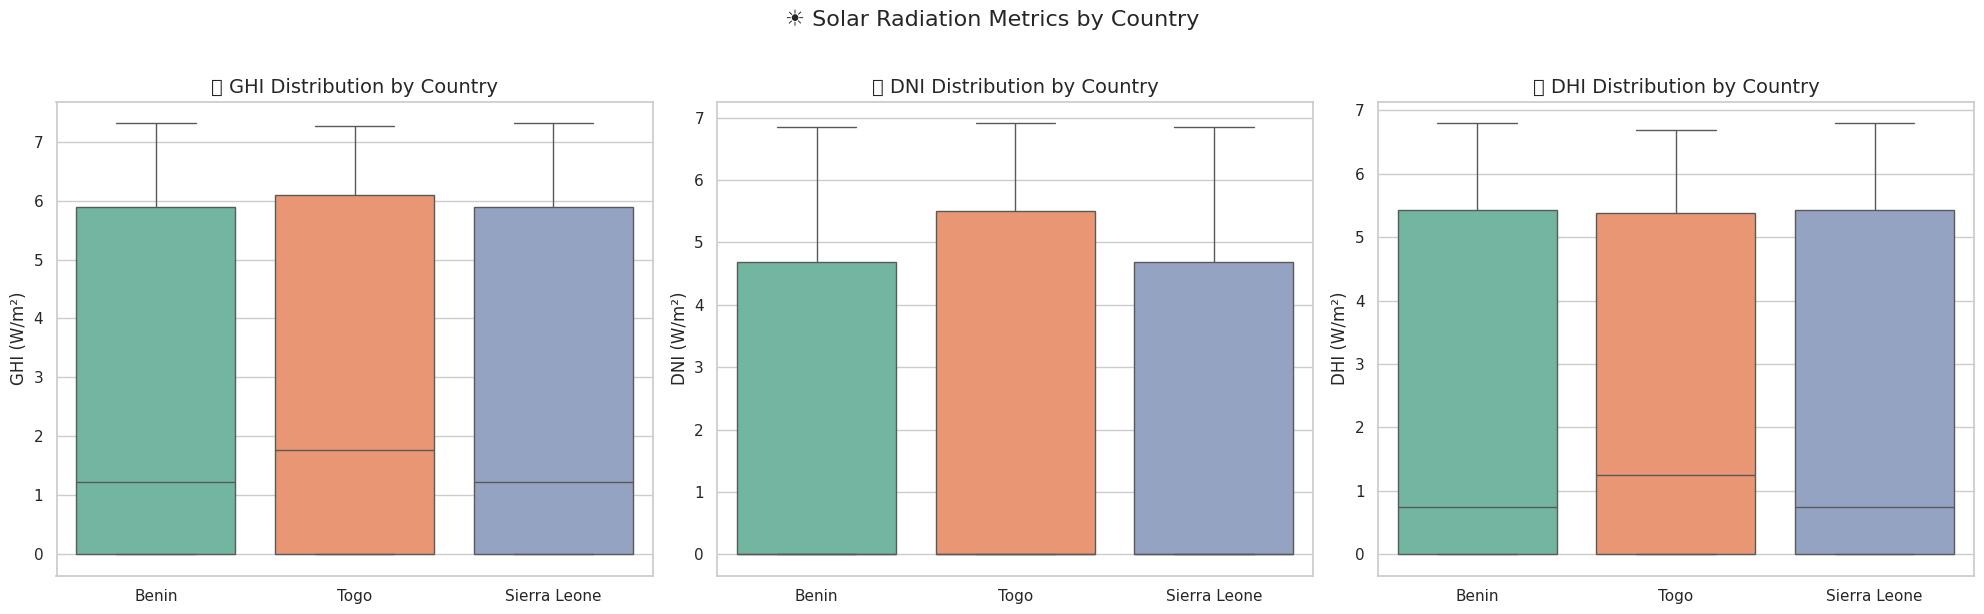

In [12]:
#Create three side-by-side boxplots (use col='metric' if using FacetGrid or three subplots manually):
visualizer.plot_boxplots_comparison()


<div style="border-radius:10px; border:orange solid; padding: 15px; font-size:100%; text-align:left; font-color:#325939;background-color:#2c2c2c">
<h3 align="left"><font color='orange'>💡Key Observations</font></h3>


#### 🌍 Global Horizontal Irradiance (GHI)
- **Togo** has the highest **median and peak GHI**, indicating strong solar availability.
- **Benin** and **Sierra Leone** have slightly lower but similar GHI distributions.
- Variability is comparable across all three.

#### 🔆 Direct Normal Irradiance (DNI)
- **Togo** leads with the **highest median and maximum DNI**.
- **Benin** and **Sierra Leone** show similar, lower levels.
- This gives Togo an edge for technologies using direct sunlight (e.g., CSP).

#### ☁️ Diffuse Horizontal Irradiance (DHI)
- All three countries show **similar median and spread**, indicating comparable diffuse sunlight levels.

---

### ✅ Country Suitability for Solar Investment

| Country       | Summary                                                                 |
|---------------|-------------------------------------------------------------------------|
| **🇹🇬 Togo**       | 🌟 Most promising overall. Strong GHI & DNI. Ideal for fixed & tracking systems. |
| **🇧🇯 Benin**      | 👍 Good potential. Slightly lower DNI than Togo, but competitive GHI.          |
| **🇸🇱 Sierra Leone** | ⚠️ Feasible, but with lower GHI & DNI. May require more efficient tech or support. |

---

### 📌 Conclusion

**Togo** From this graph alone Togo seems to stand out as the best candidate for solar investment, due to its high levels of both **total** and **direct** irradiance. **Benin** is a strong secondary option, while **Sierra Leone** may require more tailored solutions.


## 📋 4. Summary Table

In [14]:
#Use groupby for mean, median, std:
summary = f.groupby('country')[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std']).round(2)
summary

GHI                DNI                DHI             
              mean median   std  mean median   std  mean median   std
country                                                              
Benin         2.78   1.22  2.87  1.89    0.0  2.58  2.54   0.74  2.65
Sierra Leone  2.78   1.22  2.87  1.89    0.0  2.58  2.54   0.74  2.65
Togo          2.87   1.78  2.95  2.17    0.0  2.77  2.58   1.25  2.65

## 📐 5. Statistical Test

In [15]:
# ANOVA (parametric)
f_stat, p_val = f_oneway(
    benin['GHI'].dropna(),
    togo['GHI'].dropna(),
    sl['GHI'].dropna()
)
print(f"ANOVA F-statistic: {f_stat:.2f}, p-value: {p_val:.4f}")

ANOVA F-statistic: 163.54, p-value: 0.0000


In [16]:

# Kruskal-Wallis (non-parametric)
h_stat, kw_p_val = kruskal(
    benin['GHI'].dropna(),
    togo['GHI'].dropna(),
    sl['GHI'].dropna()
)
print(f"Kruskal-Wallis H-statistic: {h_stat:.2f}, p-value: {kw_p_val:.4f}")

Kruskal-Wallis H-statistic: 428.27, p-value: 0.0000


<div style="border-radius:10px; border:orange solid; padding: 15px; font-size:100%; text-align:left; font-color:#325939;background-color:#2c2c2c">
<h3 align="left"><font color='orange'>💡Key Observations in Statistical Significance of GHI Differences</font></h3>
Both tests indicate that the differences in GHI between the three countries are <b><i>highly statistically significant</i></b>.

However, it is important to note that the **sample size exceeds 1.5 million records**, which greatly increases statistical power. This means that even **small differences** in GHI values may result in **very low p-values**, potentially overstating their practical significance.

🧠 **Insight**: While the statistical tests confirm that GHI differs between countries, further analysis should consider the **magnitude** of those differences and their **real-world impact** on solar energy potential before drawing conclusions.


## 📊 6. Visual Summary: Average GHI per Country

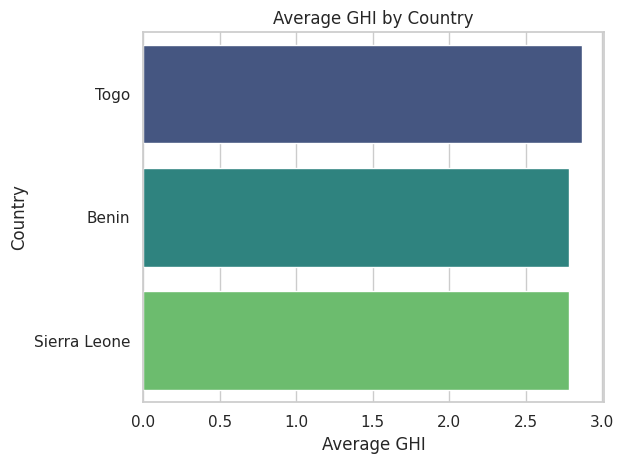

In [17]:
 # Average GHI per Countr
visualizer.plot_avg_ghi_by_country()

## 🧠 7. Key Observations

<div style="border-radius:10px; border:orange solid; padding: 15px; font-size:100%; text-align:left; font-color:#325939;background-color:#2c2c2c">
<h3 align="left"><font color='orange'>💡Solar Potential Insights Summary</font></h3>

- **Togo 🇹🇬 leads in solar potential**, with the highest median and peak values in both Global Horizontal Irradiance (GHI) and Direct Normal Irradiance (DNI), making it ideal for both fixed and tracking PV systems.

- **Benin 🇧🇯 shows solid potential**, with slightly lower but still competitive GHI and DNI values compared to Togo, supporting viable solar energy investments.

- **Sierra Leone 🇸🇱 lags slightly behind**, with lower GHI and DNI values; while still feasible for solar projects, it may require more efficient or adaptive technologies for optimal returns.



<div style="border-radius:10px; border:orange solid; padding: 15px; font-size:100%; text-align:left; font-color:#325939;background-color:#2c2c2c">
<h3 align="left"><font color='orange'>✅ Recommendations</font></h3>

Based on the comparative analysis of Global Horizontal Irradiance (GHI), Direct Normal Irradiance (DNI), and Diffuse Horizontal Irradiance (DHI) across Benin, Togo, and Sierra Leone, the following recommendations are proposed:

- **🇹🇬 Prioritize Solar Investments in Togo**
  - Togo consistently ranks highest in GHI and DNI, making it the most promising candidate for both **fixed-tilt** and **tracking/concentrated solar technologies**.
  - Recommended for large-scale deployment of solar farms and CSP infrastructure.

- **🇧🇯 Consider Benin for Secondary Expansion**
  - Benin exhibits strong solar metrics, particularly in GHI, and presents a reliable environment for **photovoltaic (PV)** installations.
  - Suitable for phased investment or pilot programs to validate longer-term scalability.

- **🇸🇱 Approach Sierra Leone with Caution**
  - While DHI levels are on par with other countries, the comparatively lower GHI and DNI suggest reduced efficiency for traditional solar setups.
  - Investments should focus on **high-efficiency systems** or be supported by **hybrid solutions** and **policy incentives**.

- **⚠️ Consider Practical Factors Beyond Irradiance**
  - Further due diligence should evaluate infrastructure readiness, grid capacity, regulatory environment, and maintenance logistics.
  - Statistical significance should be balanced with **practical impact and ROI**.

> 🧠 *Note: Although the results are statistically significant (p < 0.0001), the large dataset (1.5M+ rows) may inflate the sensitivity of tests. Focus should remain on **practical advantages** over purely statistical ones.*
